# LIBRERIAS

In [1]:
import pandas as pd
import numpy as np

## Librerias para graficación
import matplotlib.pyplot as plt
import seaborn as sns

# LECTURA DEL DATASET

In [2]:
try:
    df = pd.read_parquet("0.parquet")
except:
    print("Downloading dataset .....")
    !curl -L "https://huggingface.co/datasets/GonzaloA/fake_news/resolve/refs%2Fconvert%2Fparquet/default/train/0000.parquet" -o 0.parquet 

In [3]:
df

,Unnamed: 0,title,text,label
0,0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0
1,1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0
2,2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1
3,3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0
4,4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0
...,...,...,...,...
24348,24348,EU Parliament chief asks Poland to ensure MEPs...,WARSAW (Reuters) - The president of the Europe...,1
24349,24349,Chemical weapons watchdog found sarin used in ...,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,1
24350,24350,"Melissa Harris-Perry Is DONE With MSNBC, Pens...","As you may or may not know at this point, MSNB...",0
24351,24351,Trump's pick for Navy secretary withdraws,WASHINGTON (Reuters) - U.S. President Donald T...,1


In [4]:
# Eliminamos columnas innecesarias para el entramiento del modelo
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.columns

Index(['title', 'text', 'label'], dtype='object')

d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(-12.430555555555555, 0.5, 'Conteo')

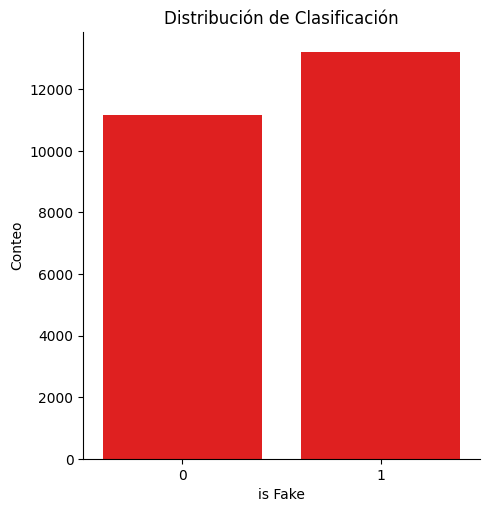

In [5]:
# Visualizamos si la data esta balanceada
sns.catplot(x="label", kind="count", color="r", data=df)
plt.title("Distribución de Clasificación")
plt.xlabel("is Fake")
plt.ylabel("Conteo")

# Pre-Procesado del Dataset

In [6]:
import re        # Libreria para expresiones regulares
import gensim    # Libreria para el pre-procesamiento de lenguaje natural
import gensim.downloader
import nltk      # Libreria con p   

- Tokenizacion, limpieza de caracteres especiales, espacios vacios

In [7]:
def processing_text(texto):
    # Paso 1: Remover con un expresión regular carateres especiales (no palabras).
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # Paso 2: Remover ocurrencias de caracteres individuales
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
    # Paso 4: Simplificar espacios concecutivos a un único espacio entre palabras
    processed_feature = re.sub(' +', ' ', processed_feature)
    # Paso 5: Pasar todo el texto a minúsculas
    processed_feature = processed_feature.lower()
    # Paso 6: Aplicar stemming. Es una forma de enviar las palabras a una raiz común simplificando de esta manera el vocabulario.
    # processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])

    return processed_feature

In [8]:

# El texto ya procesado de cada ejemplo en nuestro dataset lo almacenaremos en la variable "texto_procesado"
df['features'] = list(map(lambda x: gensim.utils.simple_preprocess(x), df['title']+df['text']))
df.head(5)

,title,text,label,features
0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0,"[maury, show, official, facebook, posts, cked,..."
1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0,"[trump, favorite, news, channel, tries, to, so..."
2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1,"[russia, warns, iraq, kurds, not, to, destabil..."
3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0,"[watch, steve, scalise, throw, strike, at, the..."
4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0,"[trump, will, hate, what, stephen, colbert, ju..."


In [9]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['features'], df['label'] , test_size=0.2)

## Creating the embedding -> Word2Vec / BOW

In [10]:
from gensim.models import Word2Vec

In [11]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [12]:
try:
    # Read the 'word2vec-google-news-300'
    word2vec = Word2Vec.load("word2vec.model")
except:
    # Download the 'word2vec-google-news-300'
    print("Generating model word2vec")
    word2vec = gensim.downloader.load("word2vec-google-news-300")
    word2vec.save("word2vec.model")

Generating model word2vec


In [13]:
word2vec.most_similar('king')

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.5432944297790527),
 ('throne', 0.5422105193138123)]

In [14]:
words = set(word2vec.index_to_key)
X_train_vect = [np.array([word2vec[i] for i in ls if i in words]) for ls in X_train]

X_test_vect = [np.array([word2vec[i] for i in ls if i in words]) for ls in X_test]

## Padding Methods

In [15]:
from keras.preprocessing.sequence import pad_sequences


def padding_2d(train):
    X_train_vect_avg = []
    for v in train:
        if v.size:
            X_train_vect_avg.append(v.mean(axis=0))
        else:
            X_train_vect_avg.append(np.zeros(100, dtype=float))
    return X_train_vect_avg


def padding_3d(train, max_length= 100):
    # Padding para que todos los vectores tengan la misma longitud
    return pad_sequences(train, maxlen=max_length, padding="post")

## Padding

In [16]:
def padding(x_train, y_train, method="3d"):
    if method == "3d":
        x = pad_sequences(x_train, maxlen=max_length, padding="post")
        y = pad_sequences(y_train, maxlen=max_length, padding="post")
    else:
        x = padding_2d(x_train)
        y = padding_2d(y_train)
    return (x, y)

In [17]:
X_train_vect, X_test_vect = padding(X_train_vect, X_test_vect,method="2d")

In [18]:
# Why is the length of the sentence different than the length of the sentence vector?
for i, v in enumerate(X_train_vect):
    print(len(X_train.iloc[i]), len(v))

226 300
346 300
366 300
412 300
672 300
126 300
1335 300
49 300
342 300
86 300
480 300
70 300
403 300
83 300
79 300
298 300
388 300
401 300
281 300
115 300
193 300
79 300
186 300
372 300
43 300
628 300
169 300
375 300
387 300
669 300
380 300
511 300
653 300
316 300
329 300
836 300
195 300
109 300
676 300
87 300
536 300
72 300
379 300
477 300
650 300
421 300
751 300
750 300
341 300
354 300
131 300
159 300
190 300
145 300
635 300
182 300
517 300
811 300
89 300
866 300
181 300
338 300
383 300
74 300
415 300
77 300
496 300
535 300
671 300
386 300
318 300
78 300
104 300
379 300
54 300
316 300
1026 300
133 300
162 300
441 300
41 300
294 300
709 300
325 300
319 300
604 300
806 300
1036 300
1206 300
136 300
164 300
194 300
318 300
443 300
125 300
112 300
579 300
364 300
463 300
372 300
874 300
255 300
679 300
81 300
601 300
596 300
262 300
241 300
35 300
515 300
92 300
442 300
52 300
848 300
188 300
531 300
109 300
369 300
84 300
515 300
227 300
332 300
727 300
417 300
497 300
424 300
656 300


# Modelating

## Redes Neuronales 

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Construir y entrenar la red neuronal
model = Sequential()
model.add(Dense(4, input_shape=(300,), activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(2, input_shape=(300,), activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para la clasificación binaria

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 1204      
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1217 (4.75 KB)
Trainable params: 1217 (4.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(np.array(X_train_vect), y_train, epochs=1000, batch_size=16, verbose=True, validation_data=(np.array(X_test_vect), y_test), workers=5)

In [95]:
# Evaluar el modelo
loss, accuracy = model.evaluate(np.array(X_test_vect), y_test)
print(f'Accuracy: {accuracy}')

153/153 [==============================] - 0s 1ms/step - loss: 0.2022 - accuracy: 0.9458
Accuracy: 0.9458016753196716


In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

153/153 [==============================] - 0s 1ms/step


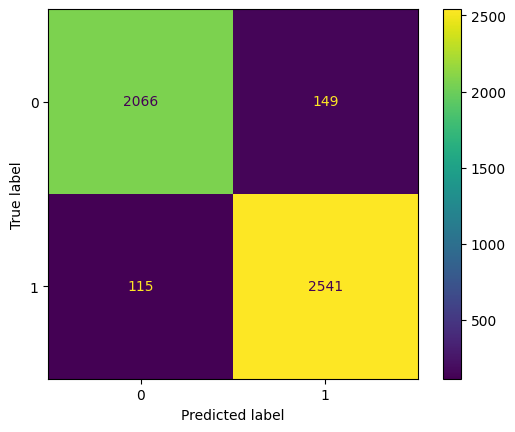

In [98]:
predictions = model.predict(np.array(X_test_vect))
predictions = list(map(lambda x: 1 if (x > 0.5) else 0, predictions))

cm = confusion_matrix(y_test, predictions,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [99]:
print(classification_report(y_test, list(predictions), digits=4))

              precision    recall  f1-score   support

           0     0.9473    0.9327    0.9399      2215
           1     0.9446    0.9567    0.9506      2656

    accuracy                         0.9458      4871
   macro avg     0.9459    0.9447    0.9453      4871
weighted avg     0.9458    0.9458    0.9458      4871



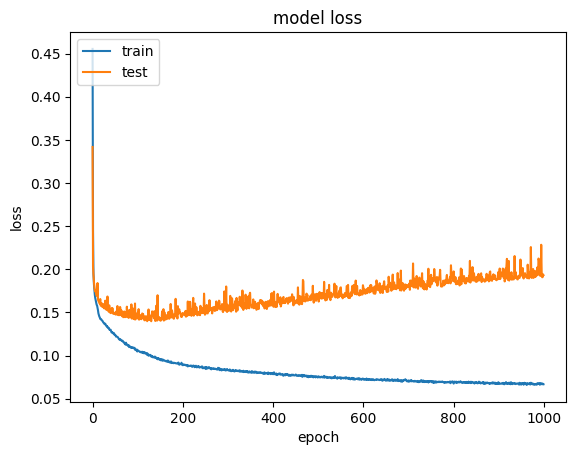

In [100]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()